First Experiments with Color Swapping
... following along with Aakash Agrawal's Medium blog post: https://medium.com/data-science/color-swapping-techniques-in-image-processing-fe594b3ca31a

Goal:
- swap the green portions in the Penn map with orange

In [53]:
import cv2
import matplotlib.pyplot as plt
import os
from PIL import Image

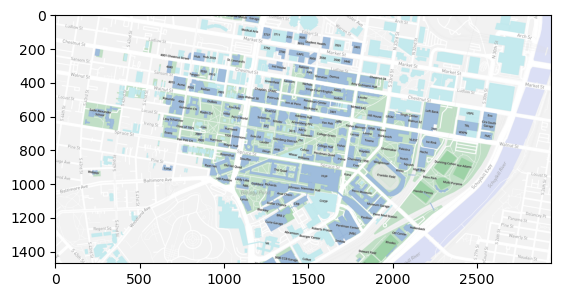

In [56]:
# Load images
img_penn = cv2.imread('images/penn_map.png')
img_penn = cv2.cvtColor(img_penn, cv2.COLOR_BGR2RGB)  # OpenCV, by default, uses BGR space

img_septa = cv2.imread('images/septa_map.jpg')
img_septa = cv2.cvtColor(img_septa, cv2.COLOR_BGR2RGB)  # OpenCV, by default, uses BGR space

img_nyc = cv2.imread('images/nyc_map.jpg')
img_nyc = cv2.cvtColor(img_nyc, cv2.COLOR_BGR2RGB)  # OpenCV, by default, uses BGR space

img_crystal_lake = cv2.imread('images/crystal_lake_il_map.jpeg')
img_crystal_lake = cv2.cvtColor(img_crystal_lake, cv2.COLOR_BGR2RGB)  # OpenCV, by default, uses BGR space

plt.imshow(img_penn)

First Attempt: Swapping w/in the RGB space

In [57]:
# Function to try swapping RGB colors
def rgb_swap(img, img_name):
    folder_path = "output/iteration_1_rgb_swap/"
    # create a copy of the original image
    img_rgb = img.copy()

    # extract channels of the rgb image
    r = img_rgb[:,:,0]  # first : takes all the rows, second : takes all the columns, 0 takes the first channel (R)
    b = img_rgb[:,:,2]

    # subtracting blue values and adding red to make the image more orange?
    b = b - 75
    r = r + 75    

    # if pixel values become > 255, subtract 255 (clipping, but in a circular fashion; 255 + x goes to x instead of 255)
    cond = r[:, :] > 255 # boolean 2D arr
    r[cond] = r[cond] - 255 

    # if pixel values become < 0, add 255 to keep within range
    b_cond = b[:, :] < 0 # boolean 2D arr
    b[b_cond] = b[b_cond] + 255 

    # assign the modified channel to image
    img_rgb[:,:,0] = r
    img_rgb[:,:,2] = b

    plt.imshow(img_rgb)

    output_img = Image.fromarray(img_rgb)
    output_img.save(os.path.join(folder_path, img_name))

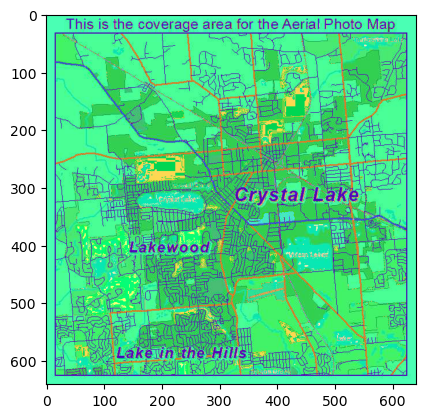

In [58]:
# Save images to a folder
rgb_swap(img_penn, 'penn_map.png')

rgb_swap(img_septa, 'septa_map.png')

rgb_swap(img_nyc, 'nyc_map.png')

rgb_swap(img_crystal_lake, 'crystal_lake_il_map.png')

Second Attempt: Changing hue in HSV

In [59]:
def hsv_swap(img, img_name):
    folder_path = "output/iteration_2_hsv_swap/"
    # convert the image from rgb space to hsv space
    img_hsv = cv2.cvtColor(img, cv2.COLOR_RGB2HSV)

    # extract the hue channel from the hsv image
    hue = img_hsv[:,:,0]

    # decrement the hue values by 20
    hue = hue - 60

    # if pixel values become < 180, add 180 
    cond = hue[:, :] < 0
    hue[cond] = hue[cond] + 180

    # assign the modified hue channel to hsv image
    img_hsv[:,:,0] = hue

    im = cv2.cvtColor(img_hsv, cv2.COLOR_HSV2RGB)
    
    plt.imshow(im)

    output_img = Image.fromarray(im)
    output_img.save(os.path.join(folder_path, img_name))

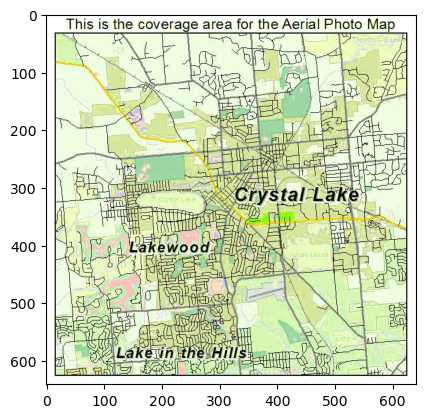

In [60]:
# Save images to a folder
hsv_swap(img_penn, 'penn_map.png')

hsv_swap(img_septa, 'septa_map.png')

hsv_swap(img_nyc, 'nyc_map.png')

hsv_swap(img_crystal_lake, 'crystal_lake_il_map.png')